In [3]:
import tensorflow as tf

In [5]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 203s 3us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
base_dir = R'E:\Data_Sets\kaggle_original_data\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [10]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [16]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [17]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [21]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

In [25]:
history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4222 - acc: 0.8140 - val_loss: 0.3590 - val_acc: 0.8650
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3515 - acc: 0.8510 - val_loss: 0.3204 - val_acc: 0.8770
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3101 - acc: 0.8745 - val_loss: 0.2997 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2845 - acc: 0.8825 - val_loss: 0.2934 - val_acc: 0.8770
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2594 - acc: 0.8965 - val_loss: 0.2701 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2513 - acc: 0.8925 - val_loss: 0.2744 - val_acc: 0.8870
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2298 - acc: 0.9105 - val_loss: 0.2551 - val_acc: 0.8990


In [26]:
import matplotlib.pyplot as plt

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

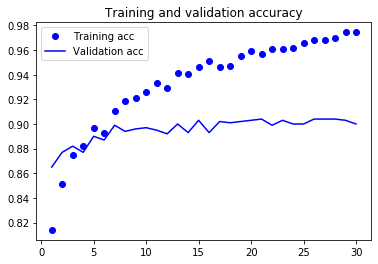

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

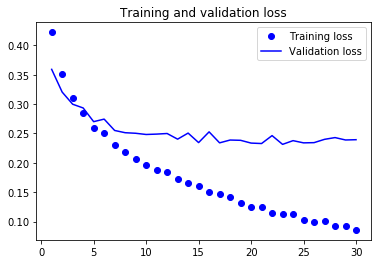

In [29]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()